<a href="https://colab.research.google.com/github/cct99/MachineLearning/blob/main/Kaggle_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Performance Prediction Model** [Prepared By: ChernChao Tai]

# **Problem Description**

In this project, we aim to use Machine Learning methods such as Lasso Regression, SVR, and FNN to predict student grades based on factors such as gender, race/ethnicity, parental level of education, etc.

# **Importing Important Libraries for the Project**

In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Importing Machine Learning Algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPooling2D, Flatten
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping

# Importing performance measure libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# **Preparing Dataset**

We load the dataset with pandas.

In [ ]:
# Loading the dataset
df = pd.read_csv("StudentsPerformance.csv")

# **Data Description**

In [ ]:
display(df)
# Exploring the dataset
print("Dimension of dataset:", df.shape)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Dimension of dataset: (1000, 8)


# **Data Visualization**

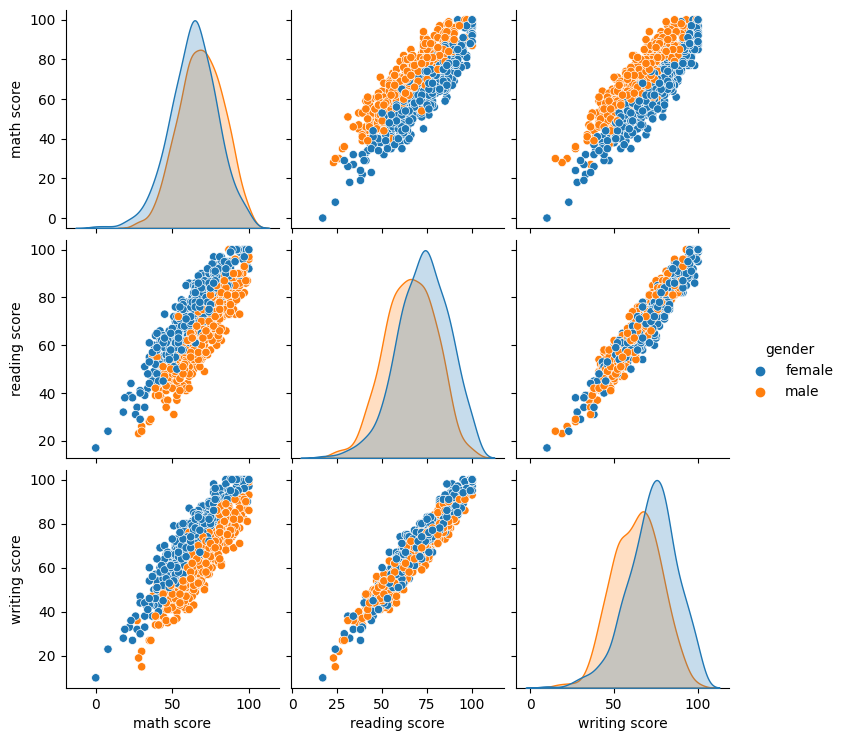

In [ ]:
# Create a pairplot to visualize the relationships between the variables
sns.pairplot(df, hue='gender')
plt.show()

<ipython-input-5-74d47bb6a10f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  parent_edu_scores = df.groupby(['parental level of education']).mean()[['math score', 'reading score', 'writing score']]


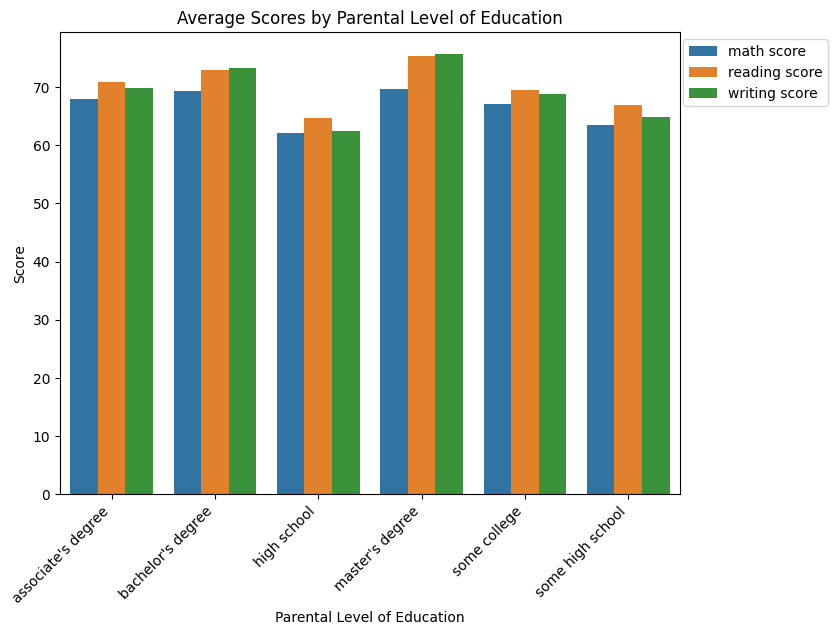

In [ ]:
# Calculate the average scores by parental level of education
parent_edu_scores = df.groupby(['parental level of education']).mean()[['math score', 'reading score', 'writing score']]
parent_edu_scores.reset_index(inplace=True)

# Create a bar chart of the average scores
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='parental level of education', y='value', hue='variable', data=pd.melt(parent_edu_scores, ['parental level of education']), ax=ax)

# Move the legend outside the plot area
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# Rotate the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Set chart title and axes labels
ax.set_title("Average Scores by Parental Level of Education")
ax.set_xlabel("Parental Level of Education")
ax.set_ylabel("Score")
plt.show()

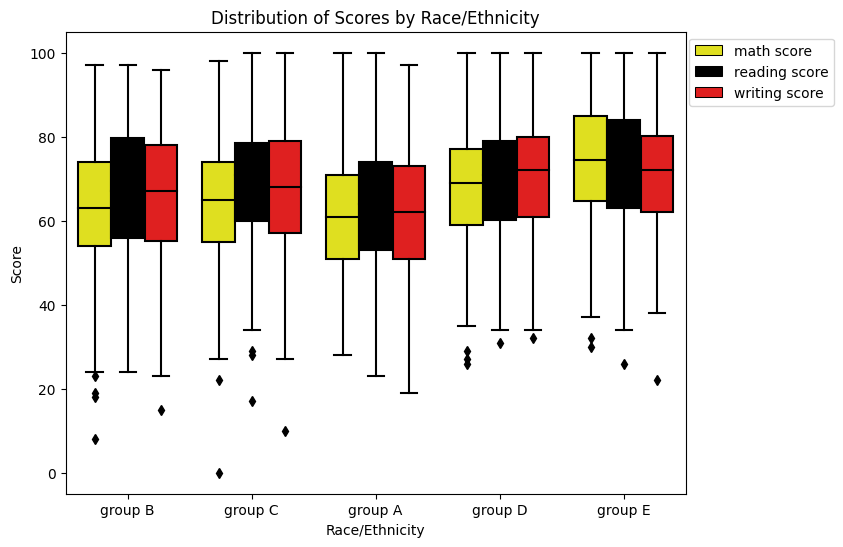

In [ ]:
# Define a custom color palette
colors = {'#000000', '#FFFF00', '#FF0000'}

# Create a box plot of scores by race/ethnicity using the custom color palette
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='race/ethnicity', y='value', hue='variable', data=pd.melt(df[['race/ethnicity', 'math score', 'reading score', 'writing score']], ['race/ethnicity']), palette=colors, ax=ax)

# Set chart title and axes labels
ax.set_title("Distribution of Scores by Race/Ethnicity")
ax.set_xlabel("Race/Ethnicity")
ax.set_ylabel("Score")

# Move the legend outside the plot area
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.show()

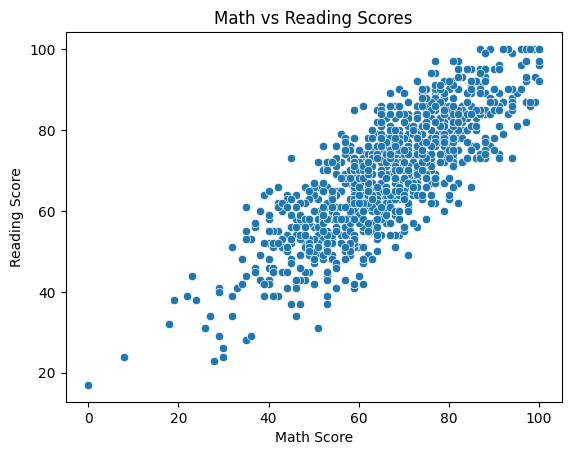

In [ ]:
# Scatter plot showing the relationship between math and reading scores
sns.scatterplot(x='math score', y='reading score', data=df)
plt.title('Math vs Reading Scores')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.show()

# **Perform One-hot Encoding**

In [ ]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])
display(df)

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,62,55,55,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,59,71,65,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,68,78,77,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


# **Training the data**

In [ ]:
# Separate the features and target variable
X = df.drop(['math score', 'reading score', 'writing score'], axis=1)
y = df[['math score', 'reading score', 'writing score']]
y = y.sum(axis=1)/3

# Perform Feature Scaling
for col in X.columns:
    X[col] = (X[col] - X[col].min()) / (X[col].max() - X[col].min())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Performing Lasso Regression with Hyperparameter Optimization**

In [ ]:

# Define the hyperparameter grid to search over
param_grid = {'alpha': [0.01, 0.1, 1, 10]}

# Create a Lasso object
lasso = Lasso()

# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_lasso = grid_search.best_estimator_

# Predict the test data using the best model
y_pred = best_lasso.predict(X_test)

# Calculate the root mean squared error, mean absolute error and R-squared score for the overall test scores
rmse_lasso = mean_squared_error(y_test, y_pred, squared=False)
mae_lasso = mean_absolute_error(y_test, y_pred)
r2_lasso = r2_score(y_test, y_pred)

In [ ]:
# Print performance metrics
print('Root Mean Squared Error:', rmse_lasso)
print('Mean Absolute Error:', mae_lasso)
print('R-squared Score:', r2_lasso)

Root Mean Squared Error: 13.411788290566452
Mean Absolute Error: 10.502742960799264
R-squared Score: 0.16089496628139277


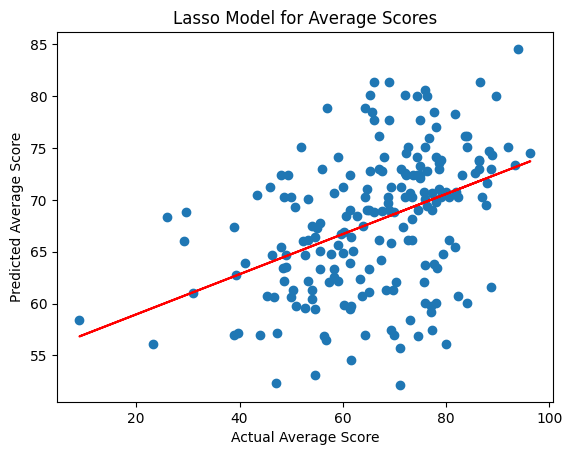

In [ ]:
# Plot the actual vs predicted average scores
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Average Score')
plt.ylabel('Predicted Average Score')
plt.title('Lasso Model for Average Scores')
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, color='red')
plt.show()

# **Performing Support Vector Regression with Hyperparameter Optimization**

In [ ]:
# Fit an SVM model with hyperparameter optimization for the average score
param_grid = {'C': [0.001, 0.1, 1, 10, 100] , 'gamma': [0.1, 0.01], 'epsilon': [0.1, 0.01]}
svm = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5)
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate performance metrics
rmse_SVR = mean_squared_error(y_test, y_pred, squared=False)
mae_SVR = mean_absolute_error(y_test, y_pred)
r2_SVR = r2_score(y_test, y_pred)

In [ ]:
# Print performance metrics
print('Root Mean Squared Error:', rmse_SVR)
print('Mean Absolute Error:', mae_SVR)
print('R-squared Score:', r2_SVR)

Root Mean Squared Error: 13.497981499820915
Mean Absolute Error: 10.53090181683885
R-squared Score: 0.1500749981557712


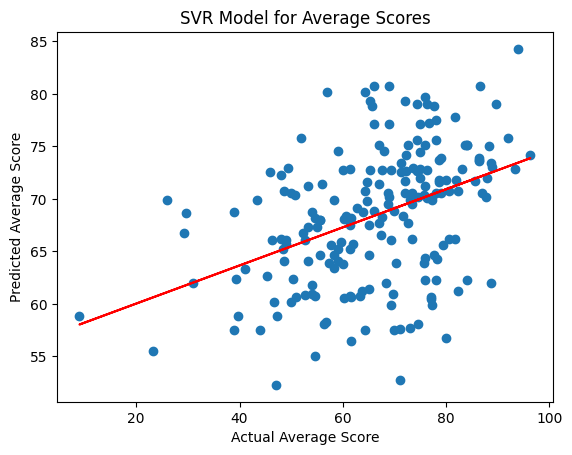

In [ ]:
# Plot the actual vs predicted average scores
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Average Score')
plt.ylabel('Predicted Average Score')
plt.title('SVR Model for Average Scores')
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, color='red')
plt.show()

# **Performing Feedforward Neural Network with Hyperparameter Optimization**

In [ ]:
def tuned_model(neurons=1, dropout_rate=0.0, layers=2, act_h='relu'):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], kernel_initializer='normal', activation=act_h))
    model.add(Dropout(dropout_rate))

    # Add hidden layers based on the number specified in function argument
    for i in range(layers-1):
        model.add(Dense(neurons, kernel_initializer='normal', activation=act_h))
        model.add(Dropout(dropout_rate))

    # add output layer
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))

    # compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

In [ ]:
# Wrap the Keras model so it can be used by RandomizedSearchCV
keras_model = KerasRegressor(build_fn=tuned_model, epochs=1000, batch_size=256, verbose=0)

<ipython-input-33-42a032306d5f>:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_model = KerasRegressor(build_fn=tuned_model, epochs=1000, batch_size=256, verbose=0)


In [ ]:
# Define the hyperparameters to search over aka search space
layers = [4, 5, 6]
neurons = [100, 150, 200]
dropout_rate = [0.2, 0.3, 0.4, 0.5]
act_h = ['relu', 'elu', 'sigmoid']

param_dist = dict(neurons=neurons, dropout_rate=dropout_rate, layers=layers, act_h=act_h)

In [ ]:
# Perform the Randomized Search
random_search = RandomizedSearchCV(estimator=keras_model, param_distributions=param_dist, cv=5, n_jobs=-1)
random_search_result = random_search.fit(X_train, y_train)

In [ ]:
# Print the best hyperparameters and corresponding mean squared error
print("Best: %f using %s" % (random_search_result.best_score_, random_search_result.best_params_))
means = random_search_result.cv_results_['mean_test_score']
stds = random_search_result.cv_results_['std_test_score']
params = random_search_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -154.700153 using {'neurons': 100, 'layers': 6, 'dropout_rate': 0.3, 'act_h': 'elu'}
-166.188287 (16.882811) with: {'neurons': 100, 'layers': 4, 'dropout_rate': 0.4, 'act_h': 'relu'}
-158.068454 (18.284681) with: {'neurons': 200, 'layers': 4, 'dropout_rate': 0.4, 'act_h': 'elu'}
-158.856952 (17.051685) with: {'neurons': 150, 'layers': 6, 'dropout_rate': 0.3, 'act_h': 'elu'}
-157.865314 (15.055803) with: {'neurons': 150, 'layers': 4, 'dropout_rate': 0.3, 'act_h': 'elu'}
-187.755453 (16.305518) with: {'neurons': 150, 'layers': 6, 'dropout_rate': 0.4, 'act_h': 'relu'}
-172.876813 (16.093301) with: {'neurons': 100, 'layers': 6, 'dropout_rate': 0.5, 'act_h': 'relu'}
-154.700153 (15.116483) with: {'neurons': 100, 'layers': 6, 'dropout_rate': 0.3, 'act_h': 'elu'}
-166.156812 (19.114968) with: {'neurons': 200, 'layers': 6, 'dropout_rate': 0.3, 'act_h': 'elu'}
-159.309592 (16.822601) with: {'neurons': 200, 'layers': 6, 'dropout_rate': 0.5, 'act_h': 'elu'}
-199.649280 (21.256826) with: {'n

In [ ]:
# Train model with best hyper-parameters
best_model = random_search_result.best_estimator_.model
best_model.fit(X_train, y_train, epochs=1000, batch_size=256, verbose=0)

In [ ]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate performance metrics
rmse_FNN = mean_squared_error(y_test, y_pred, squared=False)
mae_FNN = mean_absolute_error(y_test, y_pred)
r2_FNN = r2_score(y_test, y_pred)

7/7 [==============================] - 0s 3ms/step


# **Performing 1D Convolutional Neural Network**

Note: Due to time constraint, we performed a 1D CNN with no hyperparameter optimization/tuning.

In [ ]:
# Split the dataset into training and testing sets
scaler = MinMaxScaler()
X_train_reshaped = X_train.to_numpy().reshape(X_train.shape[0], -1)
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_reshaped = X_test.to_numpy().reshape(X_test.shape[0], -1)
X_test_scaled = scaler.transform(X_test_reshaped)

# Reshape the data for use in a 1D convolutional neural network
X_train_final = np.expand_dims(X_train_scaled, axis=2)
X_test_final = np.expand_dims(X_test_scaled, axis=2)

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train_final, y_train, epochs=100, batch_size=32, verbose=0)

y_pred = model.predict(X_test_final)
rmse_CNN = mean_squared_error(y_test, y_pred, squared=False)
mae_CNN = mean_absolute_error(y_test, y_pred)
r2_CNN = r2_score(y_test, y_pred)

7/7 [==============================] - 0s 4ms/step


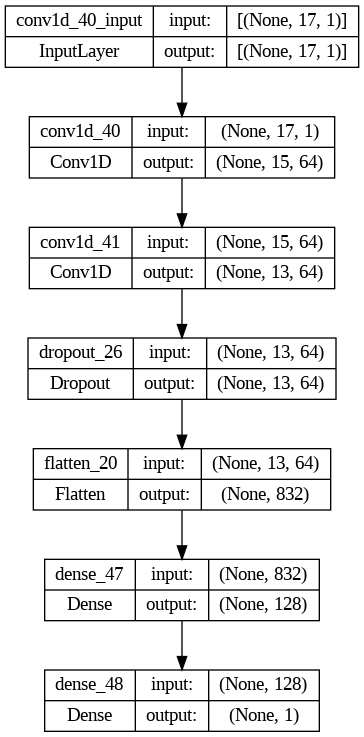

In [ ]:
from keras.utils import plot_model
# Plot the CNN architecture
plot_model(model, show_shapes=True)

# **Comparing the Overall Performance Metrics**


In [ ]:
# Overall Performance Metric For Lasso model
print('1) Lasso Regression:')
print('RMSE:', rmse_lasso, 'MAE:', mae_lasso, 'R-squared:', r2_lasso)

# Overall Performance Metric For SVR model
print('2) SVR:')
print('RMSE:', rmse_SVR, 'MAE:', mae_SVR, 'R-squared:', r2_SVR)

# Performance Metric For FNN model
print('3) FNN:')
print('RMSE:', rmse_FNN, 'MAE:', mae_FNN, 'R-squared:', r2_FNN)

# Performance Metric For CNN model
print('4) CNN:')
print('RMSE:', rmse_CNN, 'MAE:', mae_CNN, 'R-squared:', r2_CNN)

1) Lasso Regression:
RMSE: 13.411788290566452 MAE: 10.502742960799264 R-squared: 0.16089496628139277
2) SVR:
RMSE: 13.497981499820915 MAE: 10.53090181683885 R-squared: 0.1500749981557712
3) FNN:
RMSE: 13.719091757996466 MAE: 10.740393466949463 R-squared: 0.12200171140963112
4) CNN:
RMSE: 13.307930975680211 MAE: 10.482987194061279 R-squared: 0.17384026059970714
